# what makes a house sell faster?

which factor/factors of a houses location, or structure is the biggest determining factor?

i assume it's bathrooms, but that's completely subjective opinion.
let's see what the data says
overview
stakeholder
language "translated" to what stakeholder understands

write markdown about your thought process

In [1]:
# import pandas, ordinary least squares, statsmodels,
# OLS, stats API, formula API, scipy stats, and matplotlib
# later i will import seaborn to make graphs for my presentation

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# inline matplots to display in the notebook
%matplotlib inline

# import the housing data and make it into a dataframe
homes = pd.read_csv('data/kc_house_data.csv')

In [2]:
# let's look at the dataframe
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# cleaning

at least *two* of the columns have null values that need to be filled with some value, *six* are objects, which need to be made into numerical columns
lets look at what the data values could be with .head()

In [3]:
# i chose 10 rows to see more of the options
homes.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### a few of the columns are objects. lets make them int64, or label encode them later

especially sqft_basement

In [4]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [5]:
homes['sqft_basement'] = homes['sqft_basement'].str.replace('?', '0').astype(np.float64)


C:\Users\yonic\AppData\Local\Temp/ipykernel_19020/2919231035.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  homes['sqft_basement'] = homes['sqft_basement'].str.replace('?', '0').astype(np.float64)


In [6]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64>

waterfront, view, condition, grade, yr_built, yr_renovated, and zipcode are **categorical**. i'm not sure which ones i will use, but i think i'll use LabelEncoding to make them usable

cleaning steps, i will be dropping longitude and latitude
'date' is date sold. i need two columns , one the time between year build and date sold, another the time between date renovated and date sold
1) drop long and lat
2) turn date into an int
3) turn yr renovated into an int
4) make comparisson columns
5) fill nan with zeros
6) turn objects into ints

In [7]:
homes.drop(columns=['lat', 'long'], inplace=True)

In [8]:
# convert the sell date object to a datetime object
homes['date'] = pd.to_datetime(homes['date'])
# make a new column of just the years the house was sold, as an integer 
homes['sell_yr'] = homes['date'].dt.year.astype(int)

In [9]:
# i'm only making a column that represents the difference in years, as the data set
# only has the years of when the house was build, and not the exact date

homes['sell_yr']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: sell_yr, Length: 21597, dtype: int32

In [10]:
# make a new column with the difference in years between building and selling the houses

homes['yr_diff'] = homes['sell_yr'] - homes['yr_built']

homes['yr_diff']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: yr_diff, Length: 21597, dtype: int64

In [11]:
homes['yr_diff'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

#### some houses were sold before they were built. how much did they go for?

In [12]:
fast_sell = homes.loc[homes['yr_diff'] == -1]
fast_sell

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr,yr_diff
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,...,10 Very Good,2860,710.0,2015,NaN,98040,2230,10000,2014,-1
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,...,6 Low Average,710,0.0,2015,NaN,98144,1440,4800,2014,-1
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,...,8 Good,2730,0.0,2015,0.0,98072,2520,6126,2014,-1
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,...,8 Good,1000,200.0,2015,NaN,98144,1320,1852,2014,-1
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,...,9 Better,1280,290.0,2015,NaN,98199,1570,6000,2014,-1
17084,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,...,8 Good,1380,0.0,2015,0.0,98122,1480,3600,2014,-1
19789,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,...,9 Better,1320,0.0,2015,0.0,98122,1380,1495,2014,-1
20754,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,...,8 Good,2990,0.0,2015,0.0,98133,1970,18110,2014,-1
20836,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,...,9 Better,2760,970.0,2015,0.0,98103,1800,4560,2014,-1
20947,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,...,9 Better,900,140.0,2015,0.0,98144,1350,3000,2014,-1


there doesn't appear to be any obvious similarities between the houses pre-sold

In [13]:
# fill N/A values with zeros, and convert to int, just as a precaution
homes['yr_renovated'] = homes['yr_renovated'].fillna(0).astype(int)

homes['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

In [14]:
# make a new column with the difference in years from renovation to sale

homes['yr_diff_ren'] = homes['sell_yr'] - homes['yr_renovated']

In [15]:
homes['yr_diff_ren']

0        2014
1          23
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: yr_diff_ren, Length: 21597, dtype: int32

In [16]:
homes['yr_diff_ren'].unique()

array([2014,   23, 2015,   12,    4,    1,   20,   24,   37,   10,   11,
         21,   30,   31,   60,    3,    0,    9,   69,   25,   26,   33,
         13,   14,   15,   38,   16,   45,   28,    8,   29,   34,   43,
         70,    7,   35,   18,    5,   65,   46,   66,    6,   32,   44,
         -1,   36,   40,    2,   27,   19,   51,   17,   64,   52,   22,
         61,   59,   74,   50,   53,   41,   39,   57,   55,   42,   54,
         58,   48,   47,   49,   80,   56])

### Make a column for highest price with shortest sell time

my reasoning is, the "value" of a house that sells fast will be higher if the price, divided by the amount of years since it was last renovated/created is high. houses that were less touched, but still sold well will be high, and houses that sold well and were recently renovated will be high. 
the amount of years between renovation and sale, represented by yr_diff_ren / price, which if not present will be substituted with yr_diff / price, should give a good variable to judge by.

all values in the difference and renovation difference that are less than 1, will be converted to 1 for the purposes of making this column

In [17]:
# pseudocode
# for numerator in homes:
#     if homes['yr_diff_ren'] == 0:
#         denominator = homes['yr_diff']
#     else denominator = homes['yr_diff_ren']
#     new_column_val = price / denominator

homes['flip_price'] = np.round_(np.where(homes['yr_diff_ren'] > 0, homes['price'] / homes['yr_diff_ren'], np.where(homes['yr_diff'] > 0, homes['price'] / homes['yr_diff'], homes['price'] / 1)), decimals=0)

In [18]:
homes.loc[homes['flip_price'] < 100]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr,yr_diff,yr_diff_ren,flip_price
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,2720,8062,2015,82,2015,89.0
18,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,0.0,1921,0,98002,1060,5095,2014,93,2014,94.0
92,4168000060,2015-02-26,153000.0,3,1.00,1200,10500,1.0,NO,NONE,...,0.0,1962,0,98023,1350,10500,2015,53,2015,76.0
97,1099611230,2014-09-12,199000.0,4,1.50,1160,6400,1.0,NO,NONE,...,0.0,1975,0,98023,1160,6400,2014,39,2014,99.0
107,3530510041,2014-07-23,188500.0,2,1.75,1240,2493,1.0,NO,NONE,...,0.0,1985,0,98198,1270,4966,2014,29,2014,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,6056100165,2014-12-01,175003.0,3,1.50,1390,1882,2.0,NaN,NONE,...,0.0,2014,0,98108,1490,2175,2014,0,2014,87.0
20387,6056100150,2014-06-23,160797.0,3,1.50,1270,2356,2.0,NO,NONE,...,0.0,2012,0,98108,1490,2175,2014,2,2014,80.0
20596,2724049222,2014-08-02,163800.0,2,2.50,1000,1092,2.0,NaN,NONE,...,10.0,2004,0,98118,1330,1466,2014,10,2014,81.0
20791,6056100160,2014-07-28,182568.0,4,1.50,1500,2106,2.0,NO,NONE,...,0.0,2014,0,98108,1490,2175,2014,0,2014,91.0


#### lets inspect some of the other columns
spcifically the categorial ones

In [19]:
homes['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [20]:
homes['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [21]:
homes['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [22]:
homes['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

view, grade and condition appear to have more points to their variables. condition seems like it will be more useful for our problem, as the houses we want to be dealing with will be built already. but i intend to use all three after OHE

In [23]:
# sort dataframe by flip price, which is our dependent variable
homes.sort_values(by='flip_price', inplace=True)

# Make a Simple linear regression model as a baseline

check data for three assumptions. linearity, normality, homoscedasticity

i will make y the flip price, and X the age of the house

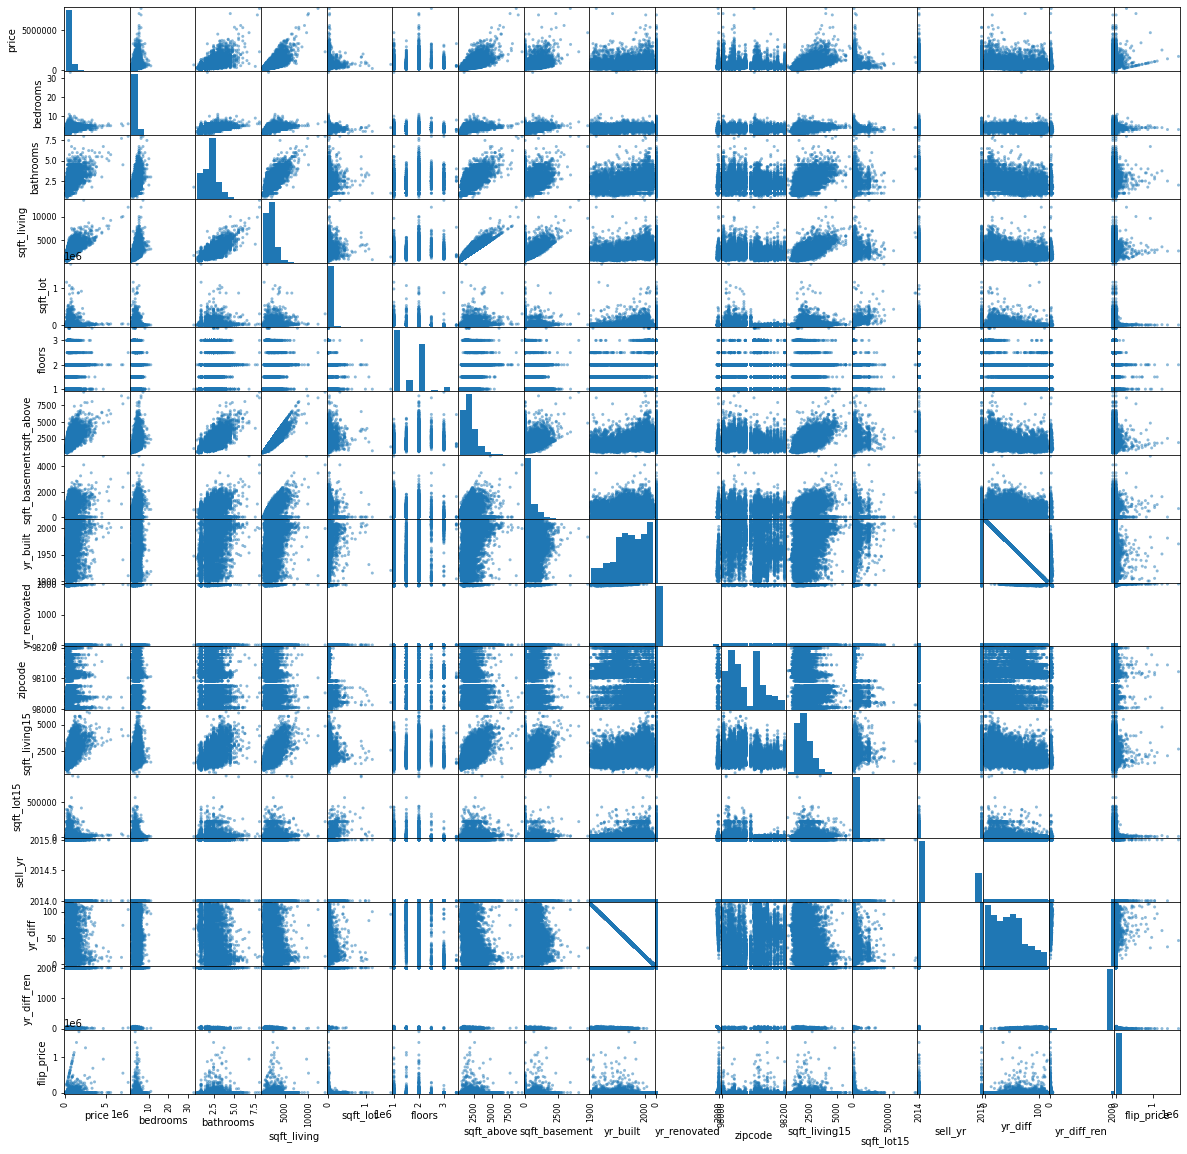

In [24]:
# let's check ALL the columns
# the_price = homes['price']
# homes.drop(columns='price', inplace=True)
data_pred = homes.iloc[:,1:24]

pd.plotting.scatter_matrix(data_pred,figsize  = [20, 20]);
plt.show()

# make a correlation matrix (heat map)

lets make a correlation matrix of the data to see which variables might have more potential correlation

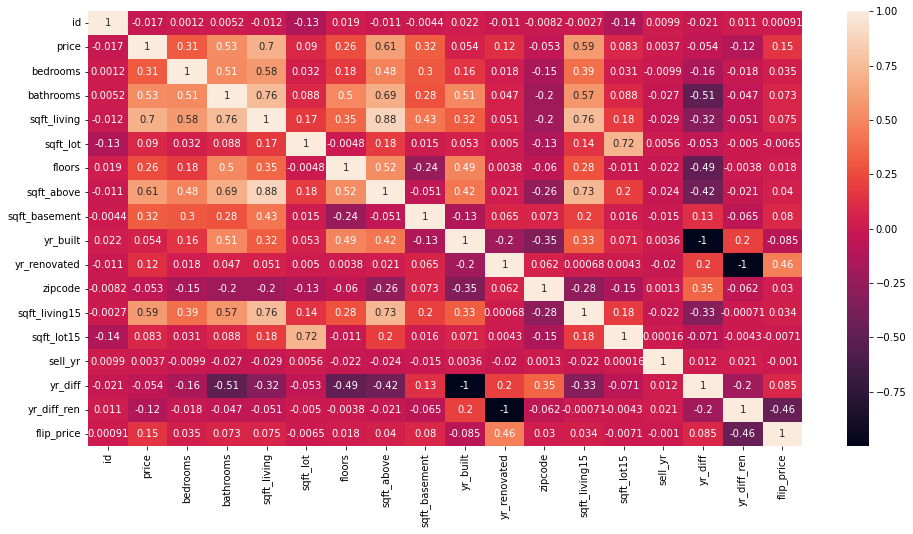

In [25]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(homes.corr(), annot=True)
plt.show()

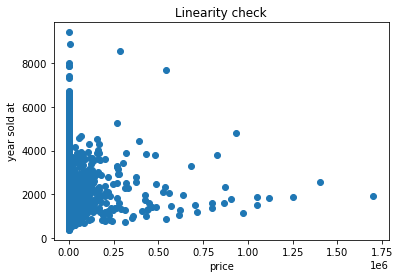

In [26]:
# scatter plot to check for linearity
plt.scatter(homes['flip_price'], homes['sqft_above'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('year sold at')
plt.show()

## not linear :-<

let's check for normality and homoskedasticity

<AxesSubplot:>

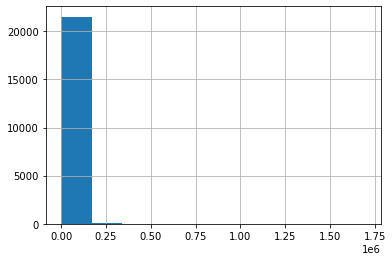

In [27]:
homes['flip_price'].hist()

#### not normal. but what if we chop off the outliers?

<AxesSubplot:>

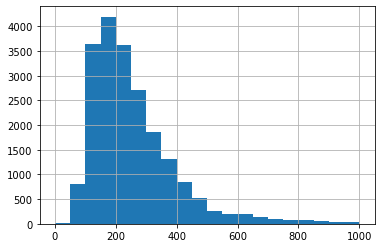

In [28]:
homes['flip_price'].hist(range=(0, 1000), bins=20)

***slightly*** more normal

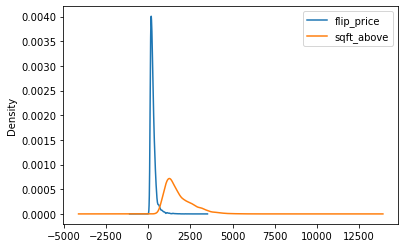

In [29]:
# lets make a new dataframe without the outliers, and put it in a Q-Q plot with some variables that i assume might be relevant
no_outliers = homes.loc[homes['flip_price'] < 2500]


flip_and_friends = no_outliers[['flip_price', 'sqft_above']]
flip_and_friends.plot.kde()
plt.show()

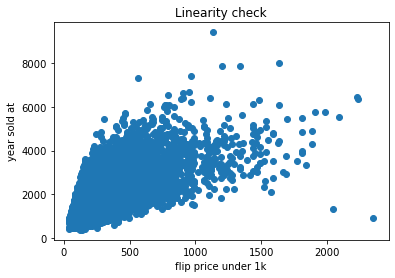

In [30]:
# let's re run the scatter plot without the outliers

plt.scatter(no_outliers['flip_price'], no_outliers['sqft_above'])
plt.title("Linearity check")
plt.xlabel('flip price under 1k')
plt.ylabel('year sold at')
plt.show()

#### let's try the scatter matrix again with the filtered data

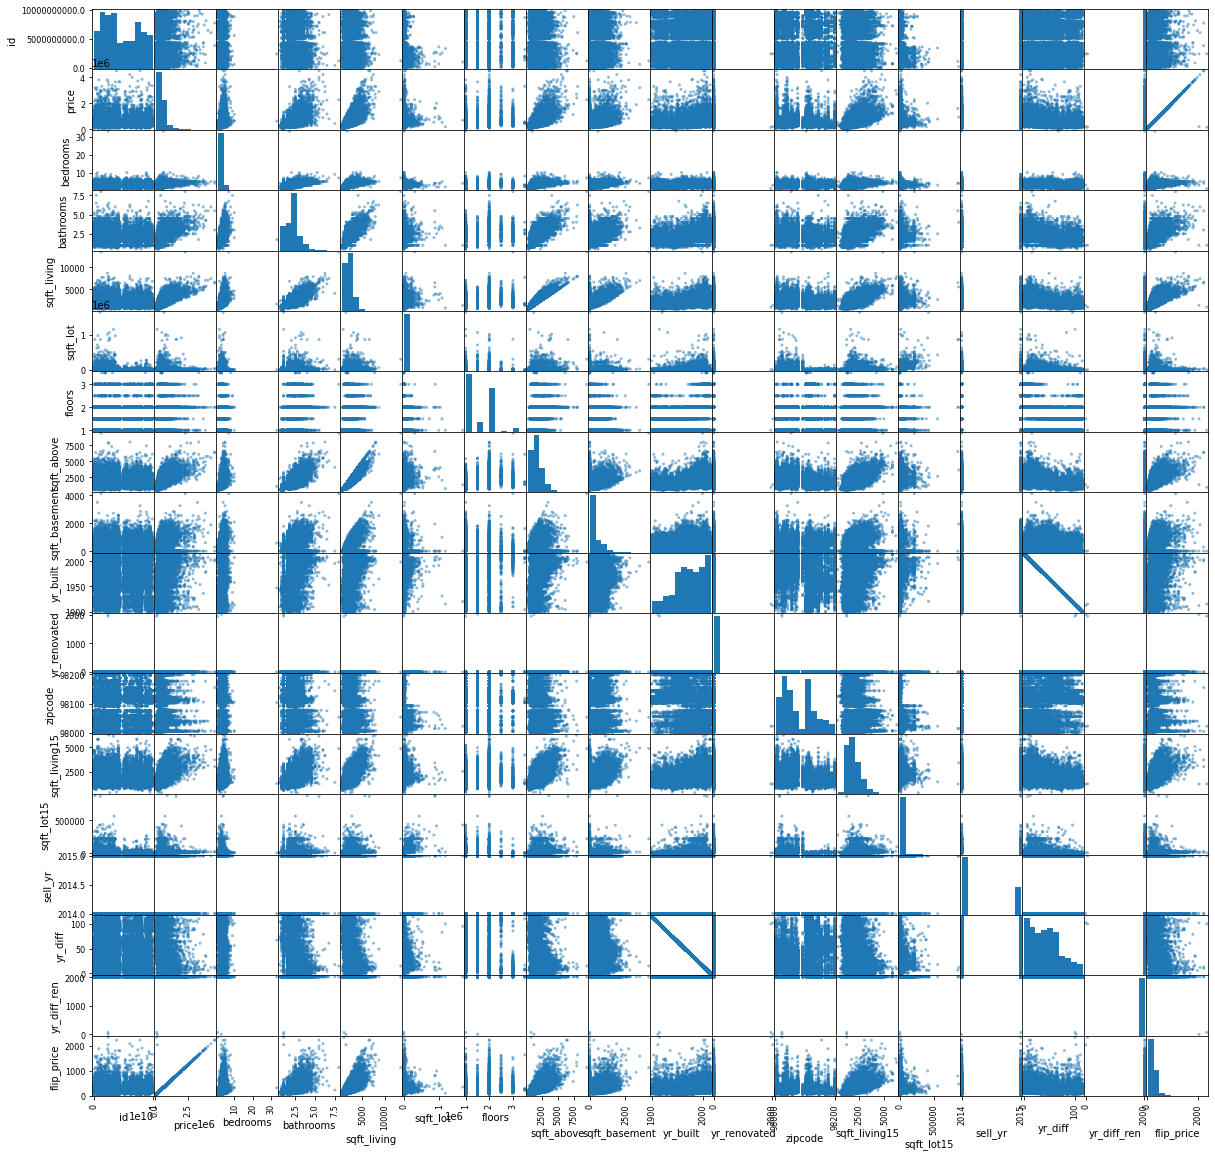

In [31]:
pd.plotting.scatter_matrix(no_outliers,figsize  = [20, 20]);
plt.show()

### that's a LOT better.

how many rows did we chop off?

In [32]:
no_o = no_outliers.shape[0]
no_o

20850

In [33]:
# how many exactly?
print(21597 - no_o)

747


not bad. i might be able to include more, and i should eventually, as i want the MOST money for the LEAST amount of time. but this suffices for now

(i ran the above four cells about ten times and found that 2500 is the sweet spot)

In [34]:
# maybe condition is better
# import LabelEncoder, OneHot Encoding from scikitlearn
# from sklearn.preprocessing import OneHotEncoder

# use label encoding
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

cond_encoded = lb_make.fit_transform(homes['condition'])

# the square feet above variable seems to be valuable

let's make a formula of X and Y being sqft_above, and flip price

In [35]:
# import OLS from statsmodel
from statsmodels.formula.api import ols

# the formula

form = 'flip_price~sqft_above'

#the model

pri_sqft_model = ols(formula=form, data=homes).fit()


In [36]:
# check the summery
pri_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             flip_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     34.12
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           5.25e-09
Time:                        12:27:34   Log-Likelihood:            -2.5732e+05
No. Observations:               21597   AIC:                         5.146e+05
Df Residuals:                   21595   BIC:                         5.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    308.0030    585.898      0.526      0.599    -840.401    1456.406
sqft_above     1.7366      0.297      5.841      0.000       1.154       2.319
==============================================================================
Omnibus:                    50058.750   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        427992362.630
Skew:                          22.907   Prob(JB):                         0.00
Kurtosis:                     691.124   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the R squared value sucks. how can we improve this model?
there is a low P value, so there is some significance, but the R squared value tells me that the model isn't good enough to account for more than 2% of the data

Square feet of living space is the highest corellating factor to price, followed by square feet besides the basement, and amount of bathrooms.
the amount of bathrooms may be an effect of having more square feet. if it's an effect of multicolinearity, we will have to remove it

## let's try it again without the outliers

In [37]:
form = 'flip_price~sqft_above'

flip_sqft_model = ols(formula=form, data=no_outliers).fit()

In [38]:
flip_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             flip_price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:27:34   Log-Likelihood:            -1.3215e+05
No. Observations:               20850   AIC:                         2.643e+05
Df Residuals:                   20848   BIC:                         2.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9599      2.263     18.101      0.000      36.524      45.395
sqft_above     0.1249      0.001    108.434      0.000       0.123       0.127
==============================================================================
Omnibus:                    13867.459   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336305.964
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      21.836   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared still sucks. 

this model only accounts for 36% of the data, a significant improvement from 2%, but not enough

let's move on to multi linear regression

## first, label encoding categorical variables

1) make columns that are label encoded ( **labeled_df = pd.get_dummies(data['column_name'], prefix='thingy', drop_first=True)** )

2) drop categorical columns ( **new_df = data.drop(['categorical_column_1','categorical_column_2','etc.'], axis=1)** )

3) combine label encoded columns to the remaining columns ( **pd.concat(new_df, labeled_df_1, etc., axis=1)** )

(waterfront is probably a useful variable, but i don't want to include it since it is a binary variable, and will probably have a drastic effect on the model anyways, as waterfronts often raise the price)

In [39]:
# ignoring zipcodes for now because it adds a HUGE amount of columns
# "grade" has spaces in the column names. let's get rid of them and put in underscores

homes.columns = homes.columns.str.replace(' ','_')
homes.columns = homes.columns.str.replace('.','_')

# make some labels

lbl_view = pd.get_dummies(homes['view'], prefix='view', drop_first=True)
lbl_condition = pd.get_dummies(homes['condition'], prefix='cond', drop_first=True)
lbl_grade = pd.get_dummies(homes['grade'], prefix='grad', drop_first=True)
# lbl_zipcd = pd.get_dummies(homes['zipcode'], prefix='zip', drop_first=True)
# lbl_bathrm = pd.get_dummies(homes['bathrooms'], prefix='bathr', drop_first=True)
lbl_flrs = pd.get_dummies(homes['floors'], prefix='flrs', drop_first=True)
lbl_bedrms = pd.get_dummies(homes['bedrooms'], prefix='bdr', drop_first=True)
lbl_bathrm = pd.get_dummies(homes['bathrooms'], prefix='bthr', drop_first=True)

C:\Users\yonic\AppData\Local\Temp/ipykernel_19020/2756839369.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  homes.columns = homes.columns.str.replace('.','_')


In [40]:
homes_sin_cat = homes.drop(['view', 'condition', 'grade', 'bedrooms', 'floors', 'bathrooms'], axis=1)

In [41]:
homes_labeled = pd.concat([homes_sin_cat, lbl_condition, lbl_grade, lbl_view, lbl_bedrms,  lbl_flrs, lbl_bathrm], axis=1)

In [42]:
homes_labeled.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,bthr_5.25,bthr_5.5,bthr_5.75,bthr_6.0,bthr_6.25,bthr_6.5,bthr_6.75,bthr_7.5,bthr_7.75,bthr_8.0
15279,40000362,2014-05-06,78000.0,780,16344,NO,780,0.0,1942,0,...,0,0,0,0,0,0,0,0,0,0
465,8658300340,2014-05-23,80000.0,430,5050,NaN,430,0.0,1912,0,...,0,0,0,0,0,0,0,0,0,0
16184,3028200080,2015-03-24,81000.0,730,9975,NaN,730,0.0,1943,0,...,0,0,0,0,0,0,0,0,0,0
8267,3883800011,2014-11-05,82000.0,860,10426,NO,860,0.0,1954,0,...,0,0,0,0,0,0,0,0,0,0
2139,1623049041,2014-05-08,82500.0,520,22334,NO,520,0.0,1951,0,...,0,0,0,0,0,0,0,0,0,0


### drop columns i don't intend to use

In [43]:
# i don't need date or sell year, or renovation year, because they directly contribute to my dependent variable

homes_labeled.drop(['id', 'price', 'date', 'waterfront', 'yr_built', 'yr_renovated', 'yr_diff', 'yr_diff_ren'], axis=1, inplace=True)

In [44]:
homes_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 15279 to 5822
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sqft_living         21597 non-null  int64  
 1   sqft_lot            21597 non-null  int64  
 2   sqft_above          21597 non-null  int64  
 3   sqft_basement       21597 non-null  float64
 4   zipcode             21597 non-null  int64  
 5   sqft_living15       21597 non-null  int64  
 6   sqft_lot15          21597 non-null  int64  
 7   sell_yr             21597 non-null  int32  
 8   flip_price          21597 non-null  float64
 9   cond_Fair           21597 non-null  uint8  
 10  cond_Good           21597 non-null  uint8  
 11  cond_Poor           21597 non-null  uint8  
 12  cond_Very Good      21597 non-null  uint8  
 13  grad_11 Excellent   21597 non-null  uint8  
 14  grad_12 Luxury      21597 non-null  uint8  
 15  grad_13 Mansion     21597 non-null  uint8  
 16  g

### that's a lot of columns...
maybe i won't use all of them

In [45]:
homes_labeled.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'sell_yr', 'flip_price', 'cond_Fair',
       'cond_Good', 'cond_Poor', 'cond_Very Good', 'grad_11 Excellent',
       'grad_12 Luxury', 'grad_13 Mansion', 'grad_3 Poor', 'grad_4 Low',
       'grad_5 Fair', 'grad_6 Low Average', 'grad_7 Average', 'grad_8 Good',
       'grad_9 Better', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'bdr_2', 'bdr_3', 'bdr_4', 'bdr_5', 'bdr_6', 'bdr_7',
       'bdr_8', 'bdr_9', 'bdr_10', 'bdr_11', 'bdr_33', 'flrs_1.5', 'flrs_2.0',
       'flrs_2.5', 'flrs_3.0', 'flrs_3.5', 'bthr_0.75', 'bthr_1.0',
       'bthr_1.25', 'bthr_1.5', 'bthr_1.75', 'bthr_2.0', 'bthr_2.25',
       'bthr_2.5', 'bthr_2.75', 'bthr_3.0', 'bthr_3.25', 'bthr_3.5',
       'bthr_3.75', 'bthr_4.0', 'bthr_4.25', 'bthr_4.5', 'bthr_4.75',
       'bthr_5.0', 'bthr_5.25', 'bthr_5.5', 'bthr_5.75', 'bthr_6.0',
       'bthr_6.25', 'bthr_6.5', 'bthr_6.75', 'bthr_7.5', 'b

In [46]:
# that's a lot of columns. i want to do something like this

# multi_model_1 = """flip_price ~ sqft_living+sqft_lot+sqft_above+sqft_basement+sell_yr+flip_price+cond_Fair+
#                 cond_Good+cond_Poor+cond_Very Good+grad_11 Excellent+ 
#                 grad_12 Luxury+grad_13 Mansion+grad_3 Poor+grad_4 Low+grad_5 Fair+grad_6 Low Average+
#                 grad_7 Average+grad_8 Good+grad_9 Better+bdr_2+bdr_3+bdr_4+
#                 bdr_5+bdr_6+bdr_7+bdr_8+bdr_9+bdr_10+bdr_11"""

# not sure why, but the column naming i did before got reset
homes_labeled.columns = homes_labeled.columns.str.replace('.','_')
homes_labeled.columns = homes_labeled.columns.str.replace(' ','_')


y_var = 'flip_price'
x_vars = homes_labeled.drop('flip_price', axis=1)
all_columns = '+'.join(x_vars.columns)
multi_formula_1 = y_var + '~' + all_columns

C:\Users\yonic\AppData\Local\Temp/ipykernel_19020/737522633.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  homes_labeled.columns = homes_labeled.columns.str.replace('.','_')


In [47]:
model_ver_1 = ols(formula=multi_formula_1, data=homes_labeled).fit()
model_ver_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             flip_price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     11.29
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          6.56e-120
Time:                        12:27:34   Log-Likelihood:            -2.5695e+05
No. Observations:               21597   AIC:                         5.140e+05
Df Residuals:                   21526   BIC:                         5.146e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.159e+06   1.16e+06     -0.997      0.319   -3.44e+06    1.12e+06
sqft_living            5.4127      3.210      1.686      0.092      -0.880      11.705
sqft_lot              -0.0076      0.008     -0.896      0.370      -0.024       0.009
sqft_above            -4.8187      3.216     -1.498      0.134     -11.122       1.484
sqft_basement         -0.2259      3.180     -0.071      0.943      -6.459       6.007
zipcode               11.9562      5.075      2.356      0.018       2.009      21.904
sqft_living15         -1.7482      0.621     -2.816      0.005      -2.965      -0.531
sqft_lot15            -0.0094      0.013     -0.727      0.467      -0.035       0.016
sell_yr               -4.3658    519.938     -0.008      0.993   -1023.483    1014.751
cond_Fair          -2789.5817   2778.578     -1.004      0.315   -8235.801    2656.638
cond_Good          -3979.1805    600.433     -6.627      0.000   -5156.073   -2802.288
cond_Poor          -2775.4347   6676.547     -0.416      0.678   -1.59e+04    1.03e+04
cond_Very_Good     -5732.7172    953.948     -6.009      0.000   -7602.527   -3862.908
grad_11_Excellent  -5002.5082   2157.961     -2.318      0.020   -9232.271    -772.745
grad_12_Luxury     -6852.0361   4229.685     -1.620      0.105   -1.51e+04    1438.461
grad_13_Mansion     2.468e+04   1.13e+04      2.184      0.029    2526.085    4.68e+04
grad_3_Poor         1943.2050    3.6e+04      0.054      0.957   -6.86e+04    7.25e+04
grad_4_Low         -2251.2964   7445.215     -0.302      0.762   -1.68e+04    1.23e+04
grad_5_Fair        -3164.4861   2894.873     -1.093      0.274   -8838.652    2509.680
grad_6_Low_Average -3238.4323   1818.091     -1.781      0.075   -6802.026     325.161
grad_7_Average     -3659.4036   1520.010     -2.407      0.016   -6638.736    -680.072
grad_8_Good        -2031.0983   1382.631     -1.469      0.142   -4741.157     678.961
grad_9_Better      -1261.5511   1329.268     -0.949      0.343   -3867.014    1343.912
view_EXCELLENT      1.304e+04   2322.409      5.615      0.000    8487.355    1.76e+04
view_FAIR           2365.5437   2261.194      1.046      0.296   -2066.564    6797.652
view_GOOD           4364.6899   1945.305      2.244      0.025     551.747    8177.633
view_NONE           -364.3289   1180.285     -0.309      0.758   -2677.774    1949.116
bdr_2               -333.0086   2737.253     -0.122      0.903   -5698.228    5032.211
bdr_3                303.7377   2739.109      0.111      0.912   -5065.120    5672.595
bdr_4                 77.8945   2797.577      0.028      0.978   -5405.564    5561.352
bdr_5              -2245.1482   2946.226     -0.762      0.446   -8019.971    3529.674
bdr_6              -5122.9405   3591.570     -1.426      0.154   -1.22e+04    1916.804
bdr_7              -6240.1021   6595.3

In [48]:
# change pandas options, because i want to see all rows in Jupyter

pd.set_option('display.max_rows', None)

model_ver_1.params

Intercept            -1.158989e+06
sqft_living           5.412676e+00
sqft_lot             -7.600387e-03
sqft_above           -4.818672e+00
sqft_basement        -2.259202e-01
zipcode               1.195624e+01
sqft_living15        -1.748213e+00
sqft_lot15           -9.427685e-03
sell_yr              -4.365809e+00
cond_Fair            -2.789582e+03
cond_Good            -3.979180e+03
cond_Poor            -2.775435e+03
cond_Very_Good       -5.732717e+03
grad_11_Excellent    -5.002508e+03
grad_12_Luxury       -6.852036e+03
grad_13_Mansion       2.468245e+04
grad_3_Poor           1.943205e+03
grad_4_Low           -2.251296e+03
grad_5_Fair          -3.164486e+03
grad_6_Low_Average   -3.238432e+03
grad_7_Average       -3.659404e+03
grad_8_Good          -2.031098e+03
grad_9_Better        -1.261551e+03
view_EXCELLENT        1.303945e+04
view_FAIR             2.365544e+03
view_GOOD             4.364690e+03
view_NONE            -3.643289e+02
bdr_2                -3.330086e+02
bdr_3               

In [49]:
pd.set_option('display.max_rows', 10)

## wooooow... that is not good

only houses with 1.5 and 3 floors performed well? something is off. maybe i should do some log transformations 

but first, let's try it again without the outliers

In [50]:
# ignoring zipcodes for now because it adds a HUGE amount of columns
# "grade" has spaces in the column names. let's get rid of them and put in underscores

no_outliers.columns = no_outliers.columns.str.replace(' ','_')
no_outliers.columns = no_outliers.columns.str.replace('.','_')

# make some labels

lbl_view = pd.get_dummies(no_outliers['view'], prefix='view', drop_first=True)
lbl_condition = pd.get_dummies(no_outliers['condition'], prefix='cond', drop_first=True)
lbl_grade = pd.get_dummies(no_outliers['grade'], prefix='grad', drop_first=True)
# lbl_zipcd = pd.get_dummies(no_outliers['zipcode'], prefix='zip', drop_first=True)
# lbl_bathrm = pd.get_dummies(no_outliers['bathrooms'], prefix='bathr', drop_first=True)
lbl_flrs = pd.get_dummies(no_outliers['floors'], prefix='flrs', drop_first=True)
lbl_bedrms = pd.get_dummies(no_outliers['bedrooms'], prefix='bdr', drop_first=True)
lbl_bathrm = pd.get_dummies(no_outliers['bathrooms'], prefix='bthr', drop_first=True)

C:\Users\yonic\AppData\Local\Temp/ipykernel_19020/1329156645.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  no_outliers.columns = no_outliers.columns.str.replace('.','_')


In [51]:
homes_sin_cat = no_outliers.drop(['view', 'condition', 'grade', 'bedrooms', 'floors', 'bathrooms'], axis=1)

In [52]:
homes_labeled = pd.concat([homes_sin_cat, lbl_condition, lbl_grade, lbl_view, lbl_bedrms,  lbl_flrs, lbl_bathrm], axis=1)

In [53]:
homes_labeled.columns = homes_labeled.columns.str.replace('.','_')
homes_labeled.columns = homes_labeled.columns.str.replace(' ','_')
homes_labeled.drop(['id', 'price', 'date', 'waterfront', 'sell_yr', 'yr_built', 'yr_renovated', 'yr_diff', 'yr_diff_ren'], axis=1, inplace=True)

y_var = 'flip_price'
x_vars = homes_labeled.drop('flip_price', axis=1)
all_columns = '+'.join(x_vars.columns)
multi_formula_no_o = y_var + '~' + all_columns



C:\Users\yonic\AppData\Local\Temp/ipykernel_19020/398369029.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  homes_labeled.columns = homes_labeled.columns.str.replace('.','_')


In [54]:
model_no_o = ols(formula=multi_formula_no_o, data=homes_labeled).fit()
model_no_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             flip_price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     578.9
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:27:34   Log-Likelihood:            -1.2584e+05
No. Observations:               20850   AIC:                         2.518e+05
Df Residuals:                   20782   BIC:                         2.523e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.15e+04   1449.385     -7.936      0.000   -1.43e+04   -8660.756
sqft_living            0.0480      0.010      5.019      0.000       0.029       0.067
sqft_lot             2.75e-05   2.44e-05      1.127      0.260   -2.03e-05    7.53e-05
sqft_above             0.0050      0.010      0.519      0.604      -0.014       0.024
sqft_basement          0.0230      0.009      2.427      0.015       0.004       0.042
zipcode                0.1199      0.015      8.125      0.000       0.091       0.149
sqft_living15          0.0226      0.002     12.441      0.000       0.019       0.026
sqft_lot15            -0.0003   3.73e-05     -8.760      0.000      -0.000      -0.000
cond_Fair              3.0348      7.981      0.380      0.704     -12.608      18.678
cond_Good             25.3876      1.737     14.615      0.000      21.983      28.792
cond_Poor              7.9974     19.333      0.414      0.679     -29.897      45.892
cond_Very_Good        62.9804      2.751     22.898      0.000      57.589      68.372
grad_11_Excellent    108.4226      6.247     17.355      0.000      96.177     120.668
grad_12_Luxury       310.8952     12.409     25.055      0.000     286.573     335.217
grad_13_Mansion      433.1321     36.192     11.968      0.000     362.192     504.072
grad_3_Poor         -248.9165    102.439     -2.430      0.015    -449.706     -48.127
grad_4_Low          -246.2798     21.533    -11.438      0.000    -288.485    -204.074
grad_5_Fair         -240.5141      8.354    -28.790      0.000    -256.889    -224.139
grad_6_Low_Average  -217.6185      5.294    -41.109      0.000    -227.995    -207.242
grad_7_Average      -184.4758      4.427    -41.675      0.000    -193.152    -175.799
grad_8_Good         -144.6679      4.026    -35.931      0.000    -152.560    -136.776
grad_9_Better        -78.9082      3.865    -20.414      0.000     -86.485     -71.332
view_EXCELLENT       191.3775      7.059     27.111      0.000     177.541     205.214
view_FAIR             29.2070      6.669      4.379      0.000      16.134      42.280
view_GOOD             30.0328      5.776      5.200      0.000      18.712      41.354
view_NONE            -31.0828      3.447     -9.018      0.000     -37.839     -24.327
bdr_2                -11.5027      8.041     -1.431      0.153     -27.263       4.257
bdr_3                -34.4055      8.054     -4.272      0.000     -50.192     -18.619
bdr_4                -43.5911      8.225     -5.300      0.000     -59.713     -27.469
bdr_5                -42.6696      8.653     -4.931      0.000     -59.629     -25.710
bdr_6                -61.0613     10.598     -5.761      0.000     -81.835     -40.288
bdr_7                -48.2530     19.978     -2.415      0.016     -87.412      -9.094
bdr_8                 46.3861     29.8

### let's make a new model with the variables that performed well in the last one

going to drop view, because it's TOO perfect

specifically: sqft_living+sqft_living15+sqft_lot15+cond_Good+cond_Very_Good+grad_4_Low+grad_5_Fair+grad_6_Low_Average+grad_7_Average+grad_8_Good+grad_9_Better+grad_11_Excellent+grad_12_Luxury+grad_13_Mansion+bdr_3+bdr_4+bdr_5+bdr_6+flrs_1_5+flrs_2_5+flrs_3_0+bthr_3_75+bthr_4_25+bthr_4_75+bthr_5_25+bthr_5_5+bthr_6+bthr_6_25+bthr_6_75+bthr_8_0

In [55]:
y_var = 'flip_price'
x_vars = 'sqft_living+sqft_living15+sqft_lot15+cond_Good+cond_Very_Good+grad_4_Low+grad_5_Fair+grad_6_Low_Average+grad_7_Average+grad_8_Good+grad_9_Better+grad_11_Excellent+grad_12_Luxury+grad_13_Mansion+bdr_3+bdr_4+bdr_5+bdr_6+flrs_1_5+flrs_2_5+flrs_3_0+bthr_3_75+bthr_4_25+bthr_4_75+bthr_5_25+bthr_5_5+bthr_6_0+bthr_6_25+bthr_6_75+bthr_8_0'
formula_2 = y_var + '~' + x_vars

model_ver_2 = ols(formula=formula_2, data=homes_labeled).fit()
model_ver_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             flip_price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1100.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:27:34   Log-Likelihood:            -1.2692e+05
No. Observations:               20850   AIC:                         2.539e+05
Df Residuals:                   20819   BIC:                         2.541e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            254.4773      6.732     37.801      0.000     241.282     267.673
sqft_living            0.0670      0.002     38.814      0.000       0.064       0.070
sqft_living15          0.0210      0.002     11.487      0.000       0.017       0.025
sqft_lot15            -0.0003   2.79e-05    -12.137      0.000      -0.000      -0.000
cond_Good             32.1339      1.736     18.508      0.000      28.731      35.537
cond_Very_Good        74.7642      2.817     26.536      0.000      69.242      80.287
grad_4_Low          -238.1673     21.564    -11.045      0.000    -280.434    -195.901
grad_5_Fair         -234.6443      8.549    -27.446      0.000    -251.402    -217.887
grad_6_Low_Average  -212.9989      5.387    -39.542      0.000    -223.557    -202.441
grad_7_Average      -187.9844      4.484    -41.920      0.000    -196.774    -179.195
grad_8_Good         -153.8725      4.084    -37.674      0.000    -161.878    -145.867
grad_9_Better        -88.9383      4.006    -22.203      0.000     -96.790     -81.087
grad_11_Excellent    124.1826      6.492     19.129      0.000     111.458     136.907
grad_12_Luxury       344.8493     12.741     27.066      0.000     319.876     369.822
grad_13_Mansion      464.9471     37.988     12.239      0.000     390.488     539.406
bdr_3                -36.9790      2.427    -15.235      0.000     -41.737     -32.221
bdr_4                -53.6792      2.845    -18.868      0.000     -59.256     -48.103
bdr_5                -43.5453      3.954    -11.014      0.000     -51.295     -35.796
bdr_6                -51.0162      7.471     -6.829      0.000     -65.659     -36.373
flrs_1_5              50.5012      2.695     18.737      0.000      45.218      55.784
flrs_2_5              90.4051      8.995     10.050      0.000      72.773     108.037
flrs_3_0              45.0361      4.599      9.793      0.000      36.022      54.050
bthr_3_75             81.5266      9.179      8.882      0.000      63.536      99.518
bthr_4_25            126.0826     12.750      9.889      0.000     101.092     151.074
bthr_4_75            258.0863     22.648     11.395      0.000     213.694     302.478
bthr_5_25             96.1219     32.409      2.966      0.003      32.597     159.647
bthr_5_5             328.4746     36.948      8.890      0.000     256.055     400.895
bthr_6_0             294.5078     48.778      6.038      0.000     198.900     390.116
bthr_6_25            402.1122     77.991      5.156      0.000     249.244     554.980
bthr_6_75           -530.6244    106.999     -4.959      0.000    -740.351    -320.898
bthr_8_0            -447.6833    108.547     -4.124      0.000    -660.444    -234.923
==============================================================================
Omnibus:                    13545.979   Durbin

In [56]:
model_ver_2.params

Intercept        254.477251
sqft_living        0.066998
sqft_living15      0.021019
sqft_lot15        -0.000339
cond_Good         32.133876
                    ...    
bthr_5_5         328.474637
bthr_6_0         294.507834
bthr_6_25        402.112162
bthr_6_75       -530.624404
bthr_8_0        -447.683330
Length: 31, dtype: float64

## MUCH better
this model accounts for 61% of the data. not perfect, but good enough to progress

### let's get Coeficients

of the model, i think?

In [57]:
#using scikit learn now for the 'split_train_test' function

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictors = homes_labeled[['sqft_living', 'sqft_living15', 'sqft_lot15',
                            'cond_Good','cond_Very_Good','grad_4_Low','grad_5_Fair','grad_6_Low_Average',
                            'grad_7_Average','grad_8_Good','grad_9_Better','grad_11_Excellent','grad_12_Luxury',
                            'grad_13_Mansion','bdr_3','bdr_4','bdr_5','bdr_6','flrs_1_5','flrs_2_5',
                            'flrs_3_0','bthr_3_75','bthr_4_25','bthr_4_75','bthr_5_25','bthr_5_5',
                            'bthr_6_0','bthr_6_25','bthr_6_75','bthr_8_0']]
y = homes_labeled['flip_price']
linreg.fit(predictors, y)
linreg.coef_

array([ 6.69977233e-02,  2.10189866e-02, -3.38708100e-04,  3.21338760e+01,
        7.47642011e+01, -2.38167331e+02, -2.34644297e+02, -2.12998925e+02,
       -1.87984371e+02, -1.53872541e+02, -8.89383039e+01,  1.24182553e+02,
        3.44849306e+02,  4.64947130e+02, -3.69789677e+01, -5.36792279e+01,
       -4.35453375e+01, -5.10161960e+01,  5.05011986e+01,  9.04050821e+01,
        4.50361389e+01,  8.15266185e+01,  1.26082610e+02,  2.58086273e+02,
        9.61218539e+01,  3.28474637e+02,  2.94507834e+02,  4.02112162e+02,
       -5.30624404e+02, -4.47683330e+02])

In [58]:
# and the intercept
linreg.intercept_

254.47725085357143

the variables with INCREASING coeficients are:
'sqft_living', 'sqft_living15',

'cond_Good','cond_Very_Good', 

'grad_11_Excellent','grad_12_Luxury','grad_13_Mansion',

'flrs_1_5','flrs_2_5','flrs_3_0',

'bthr_3_75','bthr_4_25',
'bthr_4_75','bthr_5_25','bthr_5_5','bthr_6_0','bthr_6_25'


this seems to imply that homes which have a large yard and living area, are in good condition, fit the grading requirements of 11 + (being made with excellent materials) having at least 1 1/2 floors, but not more than 3, and at least 3 bathrooms would make a house easier to flip in a relatively short period of time

# check for multicolinearity, and homoscedacity

'sqft_living' and 'sqft_living15' appear to have multicolinearity, i'll get rid of the later one. all the rest are categorical variables and should not need to be removed

In [59]:
predictors2 = homes_labeled[['sqft_living', 'sqft_lot15',
                            'cond_Good','cond_Very_Good','grad_4_Low','grad_5_Fair','grad_6_Low_Average',
                            'grad_7_Average','grad_8_Good','grad_9_Better','grad_11_Excellent','grad_12_Luxury',
                            'grad_13_Mansion','bdr_3','bdr_4','bdr_5','bdr_6','flrs_1_5','flrs_2_5',
                            'flrs_3_0','bthr_3_75','bthr_4_25','bthr_4_75','bthr_5_25','bthr_5_5',
                            'bthr_6_0','bthr_6_25','bthr_6_75','bthr_8_0']]
y = homes_labeled['flip_price']
linreg.fit(predictors2, y)
linreg.coef_

array([ 7.47762002e-02, -3.17224162e-04,  3.22496764e+01,  7.34322461e+01,
       -2.47964833e+02, -2.49210075e+02, -2.29088801e+02, -2.02114433e+02,
       -1.63477003e+02, -9.28179170e+01,  1.28716958e+02,  3.51769958e+02,
        4.70402962e+02, -3.62782234e+01, -5.21658379e+01, -4.29256196e+01,
       -5.40753548e+01,  4.86345873e+01,  8.52636434e+01,  3.73202616e+01,
        7.75688326e+01,  1.23152491e+02,  2.51143356e+02,  8.89958163e+01,
        3.13848557e+02,  2.79489391e+02,  3.81986069e+02, -5.70746088e+02,
       -4.90700369e+02])

# fit and transform? let's go! (and make test and train data sets)


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()


i will use the train and test data to gradually add features to the base model to see if any improvement has occured

In [61]:
f_t_pred = sc.fit_transform(predictors2)
X_train, X_test, y_train, y_test = train_test_split(f_t_pred, y,random_state = 0,test_size=0.20)

### get residuals

In [62]:
from sklearn.metrics import r2_score

def get_r_2(X_tr, y_tr):
    split_regr = LinearRegression().fit(X_tr,y_tr)
    y_split_pred = split_regr.predict(X_tr)
    return r2_score(y_true=y_tr,y_pred=y_split_pred)
get_r_2(X_train, y_train)

0.614662363071367

### this model isn't that good, but it's okay

get y hat value to get the Mean Squared Error

In [64]:
from sklearn.metrics import mean_squared_error

def get_mse(X_t, X_te, y_t, y_te):
    split_regr = LinearRegression().fit(X_t,y_t)
    y_hat_train = split_regr.predict(X_t)
    y_hat_test = split_regr.predict(X_te)

    train_mse = mean_squared_error(y_t, y_hat_train)
    test_mse = mean_squared_error(y_te, y_hat_test)
    print('train ',train_mse, ' test ', test_mse)
get_mse(X_train, X_test, y_train, y_test)

train  11429.5484533882  test  12508.610243990966


### that's bad. theres more than a 1,000 point difference
and the error number is huge!
that's more than 11,000$ per year last touched!

let'd make a third model, throwing out the negative coeficients

In [65]:
predictors3 = homes_labeled[[ 'sqft_living','cond_Good','cond_Very_Good','flrs_1_5',
'flrs_2_5',
'flrs_3_0'  ,
'bthr_3_75' ,
'bthr_4_25' ,
'bthr_4_75' ,
'bthr_5_25' ,
'bthr_5_5' ,
'bthr_6_0' ,
'bthr_6_25',
'grad_11_Excellent',
'grad_12_Luxury' ,
'grad_13_Mansion']]

linreg.fit(predictors3, y)
linreg.coef_

array([1.09641296e-01, 1.98631789e+01, 5.75331507e+01, 3.32845403e+01,
       1.02196309e+02, 6.86380592e+01, 9.79911782e+01, 1.33672109e+02,
       2.34354686e+02, 6.63497133e+01, 2.47766250e+02, 2.26280690e+02,
       2.65819149e+02, 1.94704980e+02, 3.79814047e+02, 4.89000679e+02])

In [66]:
f_t_pred = sc.fit_transform(predictors3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(f_t_pred, y,random_state = 0,test_size=0.20)

In [67]:
get_r_2(X_train3, y_train3)

0.5523274600800809

In [68]:
get_mse(X_train3, X_test3, y_train3, y_test3)

train  13278.471905960547  test  13361.342897375078


## that's worse as far as the R squared

the mse is slightly better, but not enough to mke this model better. what if i go back to the original model?

## check for Homoscedasticity 
i hope...

In [69]:
residuals = y_train.values-y_split_pred

mixplot = sns.scatterplot(x=y_split_pred,y=residuals)
mixplot = sns.lineplot([0,1750],[0,0],color='green')

NameError: name 'y_split_pred' is not defined

### and normality

In [ ]:
sns.distplot(residuals,kde=True)


not that bad

###  now to check for

# testing

make sure the R squared values are good, and continually check if the model we are using is producing better results than before

***BUT*** beware of over fitting, multicolinearity, confounding variables

# describe what model is doing

does it answer our business question? how does it answer it?